# Naive Bayes with sklearn

We saw in class that Naive Bayes is a probabilistic classifier, that can easily support categorical and quantitative variables.

Problem is ... `sklearn` does not natively work with both ...

We will need to split again our data in quantitative and qualitative, and then code our own suggestions to take both into account.

You can start with quantitative or qualitative data depending on the majority data type in your dataset.

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\louka\OneDrive\Bureau\math comp 2\projet\ApprentissageSupervise\projetStatsChampsLol.csv")


In [55]:
qualitative_vars = ["Ranged"]
target_vars = ["isTop","isJgl","isMid","isBot","isSup","Class"]
quantitative_vars = [col for col in df.columns if col not in qualitative_vars + target_vars + ["Name"]]
print(qualitative_vars)
print(quantitative_vars)
print(target_vars)

X_quantitative=df[quantitative_vars]
X_qualitative=df[qualitative_vars]
X_tot = df[qualitative_vars+quantitative_vars+["Class"]] 
y=df[target_vars]

['Ranged']
['HP', 'HP+', 'HP5', 'HP5+', 'MP', 'MP+', 'MP5', 'MP5+', 'AD', 'AD+', 'AS', 'AS+', 'AR', 'AR+', 'MR', 'MR+', 'MS', 'Range']
['isTop', 'isJgl', 'isMid', 'isBot', 'isSup', 'Class']


## Working with quantitative data
With quantitative data, we can use the `GaussianNB` class.

In [22]:
#pour le multiclasse

#one vs all:
#calculer le nombre de fois ou 1 est bien prédis par rappor t à 2 et 3 et etc


#attention justifier pourquoi c'est pas une accuray

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [24]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_quantitative, df["Class"])

print("======= Prediction")
predictions = gaussian_nb.predict(X_quantitative)

print("======= Results")
print(classification_report(df["Class"], predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   artillery       0.67      1.00      0.80         6
    assassin       0.67      0.59      0.62        17
  battlemage       0.70      0.64      0.67        11
       burst       0.59      0.62      0.61        16
     catcher       0.50      0.57      0.53         7
       diver       0.89      0.50      0.64        16
   enchanter       0.89      0.89      0.89         9
  juggernaut       0.50      0.79      0.61        14
    marksman       0.86      1.00      0.93        25
  skirmisher       0.75      0.43      0.55        14
  specialist       0.80      0.27      0.40        15
    vanguard       0.77      0.67      0.71        15
      warden       0.35      1.00      0.52         6

    accuracy                           0.67       171
   macro avg       0.69      0.69      0.65       171
weighted avg       0.72      0.67      0.66       171



In [30]:
predictions = gaussian_nb.predict_proba(X_quantitative)
print(pd.DataFrame(predictions).round(2))

      0     1     2     3    4    5     6    7     8    9     10    11   12
0    0.0  0.00  0.00  0.00  0.0  0.0  0.00  1.0  0.00  0.0  0.00  0.00  0.0
1    0.0  0.00  0.00  0.57  0.0  0.0  0.00  0.0  0.43  0.0  0.00  0.00  0.0
2    0.0  1.00  0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.00  0.0
3    0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.0  1.00  0.0  0.00  0.00  0.0
4    0.0  0.02  0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.98  0.0
..   ...   ...   ...   ...  ...  ...   ...  ...   ...  ...   ...   ...  ...
166  0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.0  1.00  0.0  0.00  0.00  0.0
167  1.0  0.00  0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.00  0.0
168  0.0  0.00  0.19  0.80  0.0  0.0  0.01  0.0  0.00  0.0  0.00  0.00  0.0
169  0.0  0.00  0.07  0.92  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.00  0.0
170  0.0  0.00  0.32  0.67  0.0  0.0  0.00  0.0  0.00  0.0  0.01  0.00  0.0

[171 rows x 13 columns]


**Questions**:
1. Plot the statistical distribution of your variables and see if any is highly skewed.
2. Apply Gaussian Naive Bayes to the quantitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
6. Try removing highly correlated data and see if your results improve.

Class
marksman      25
assassin      17
burst         16
diver         16
vanguard      15
specialist    15
juggernaut    14
skirmisher    14
battlemage    11
enchanter      9
catcher        7
warden         6
artillery      6
Name: count, dtype: int64


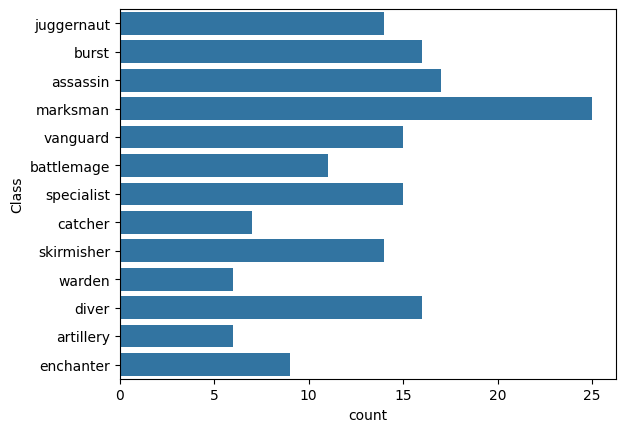

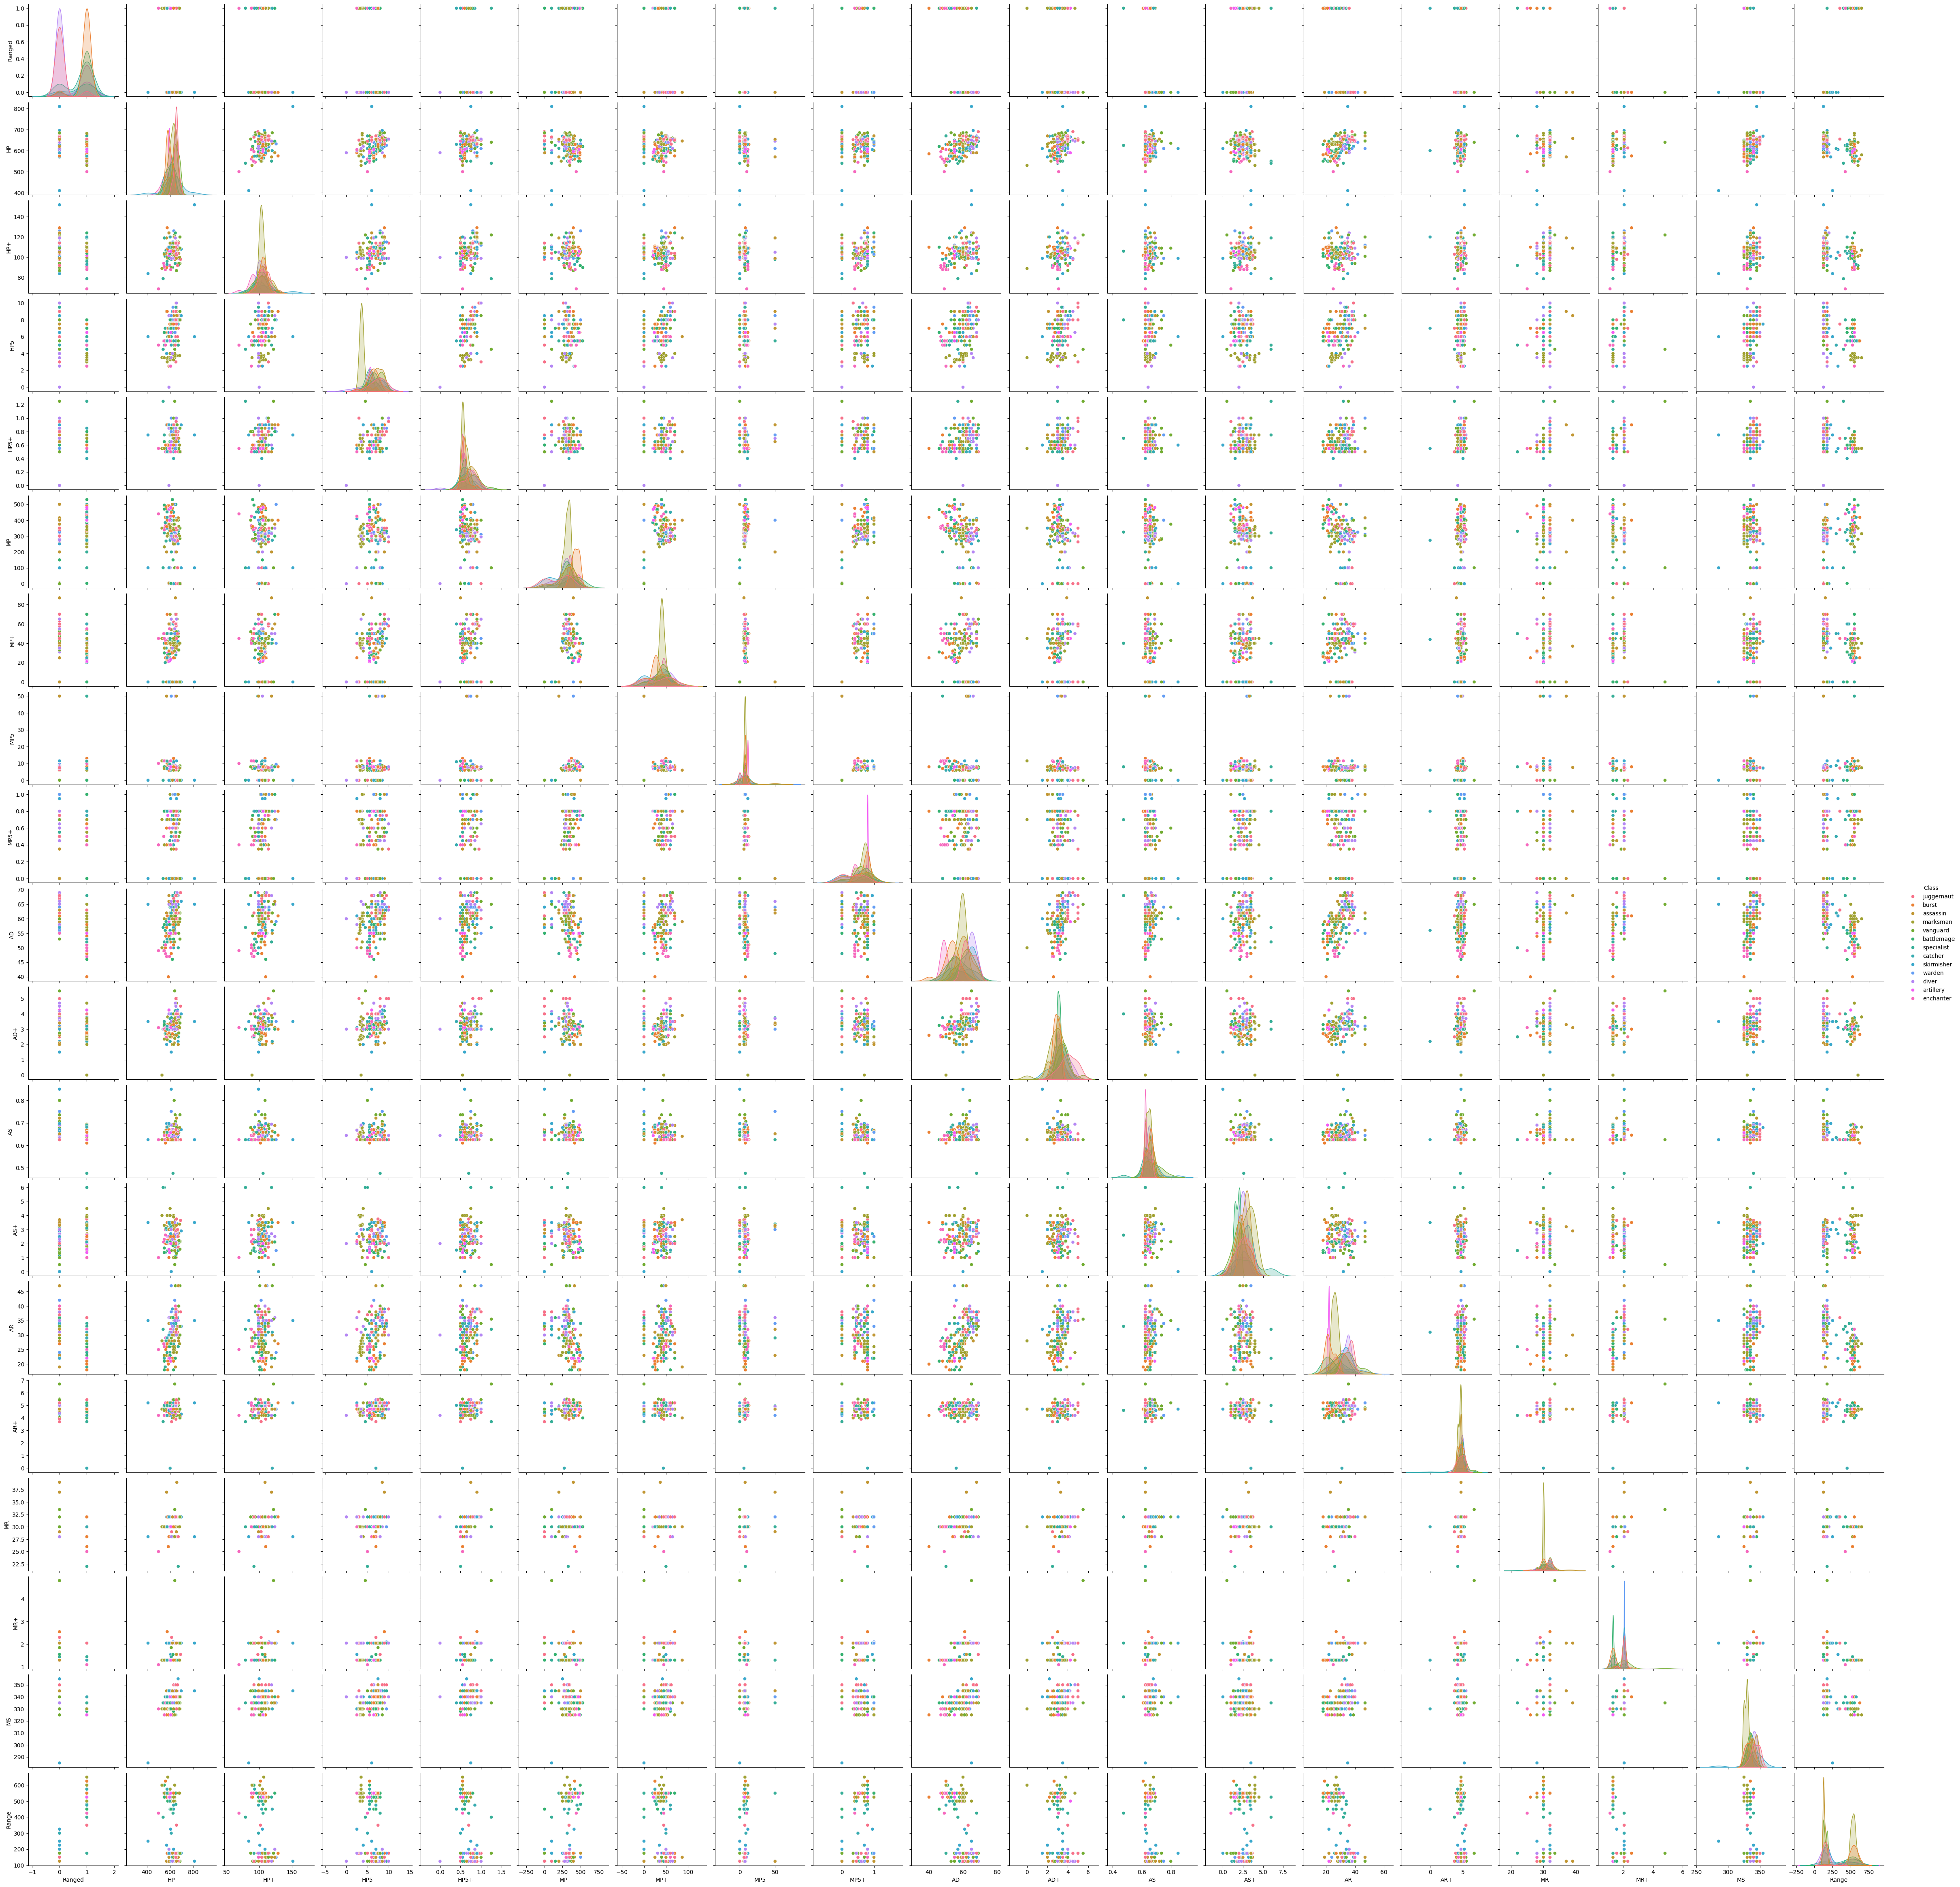

In [57]:
print(df["Class"].value_counts())
sns.countplot(df["Class"])


#for var in df["Class"]:
#    df["Class"==var]

sns.pairplot(X_tot,hue="Class")

## Working with qualitative data
With qualitative data, we can use the class CategoricalNB.

In [58]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()
encoded_vars = []
for category in X_qualitative.T:
    encoded_vars.append(encoder.fit_transform(category))

ValueError: y should be a 1d array, got an array of shape () instead.

In [66]:
X_cat = np.array(X_qualitative).T
print(X_cat)

[[0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0
  0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0
  0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0
  1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1]]


In [67]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_qualitative, df["Class"])

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_qualitative)

print("======= Results")
print(classification_report(df["Class"], predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   artillery       0.00      0.00      0.00         6
    assassin       0.19      1.00      0.32        17
  battlemage       0.00      0.00      0.00        11
       burst       0.00      0.00      0.00        16
     catcher       0.00      0.00      0.00         7
       diver       0.00      0.00      0.00        16
   enchanter       0.00      0.00      0.00         9
  juggernaut       0.00      0.00      0.00        14
    marksman       0.31      1.00      0.47        25
  skirmisher       0.00      0.00      0.00        14
  specialist       0.00      0.00      0.00        15
    vanguard       0.00      0.00      0.00        15
      warden       0.00      0.00      0.00         6

    accuracy                           0.25       171
   macro avg       0.04      0.15      0.06       171
weighted avg       0.06      0.25      0.10       171



C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

**Questions**:
1. Apply Gaussian Naive Bayes to the qualitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
5. Compare to previous results.
6. Transform every variable within your dataset to a qualitative using the class `sklearn.preprocessing.KBinsDiscretizer` and compare with previous results.
7. Compare to what you achieved using `knn`.

## Working with both data types
It is annoying that sklearn does not allow to deal with both variables types...

A solution to solve this is to:
- Fit a GaussianNB on the quantitative variables and get the probabilities `quantitative_probabilities`
- Fit a CategoricalNB on the qualitative variables `qualitative_probabilities`
- Fit a new GaussianNB on the probbailities `quantitative_probabilities` and `qualitative_probabilities`.

**Question**:
1. Implement this solution and compare the results with what you obtained previously.
2. **Bonus**: Suggest your own implementation using `sklearn` API for classifiers (see https://scikit-learn.org/stable/developers/develop.html).


In [60]:
# Next step to do: use train / test or cross val approach using this method.